In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [3]:
datos = pd.read_csv('./energia-elec-plant.csv',sep=';')
datos

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [4]:
datos.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
datos.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


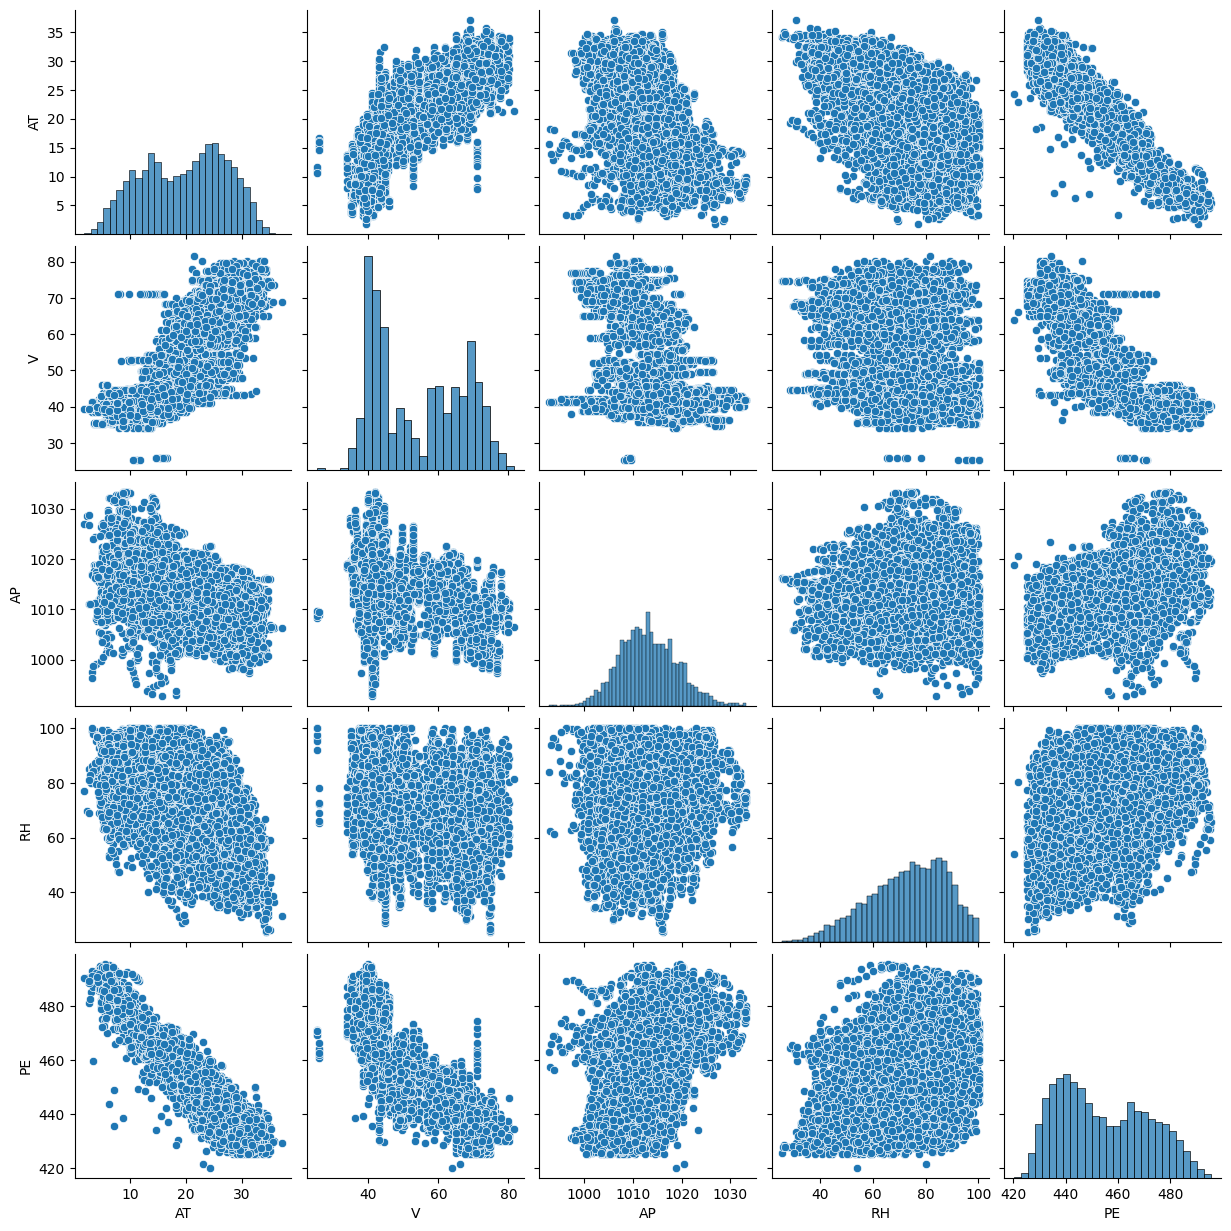

In [7]:
sns.pairplot(datos);

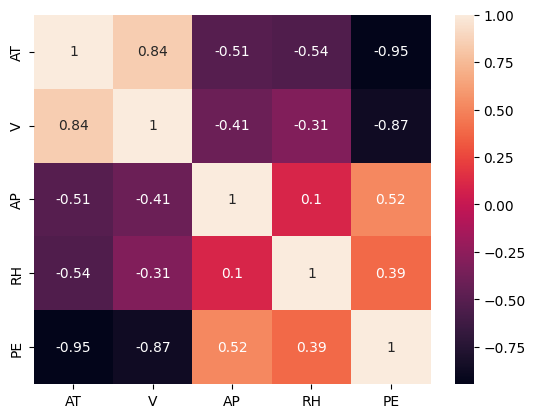

In [9]:
sns.heatmap(datos.corr(),annot=True);

In [10]:
x = datos.iloc[:,0:2].values
y = datos.iloc[:,4:5].values

In [14]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [16]:
x_train

array([[ 0.74996055,  0.72117976],
       [ 0.8640226 ,  1.26653863],
       [ 0.93648556,  1.52465942],
       ...,
       [-0.22157979, -0.83462758],
       [ 0.94990462,  1.14377386],
       [-1.77819139, -1.19033063]])

In [22]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_train)
poly.fit(x_train,y_train)

model = LinearRegression()
model.fit(x_poly,y_train)

y_pred = model.predict(poly.fit_transform(x_test))

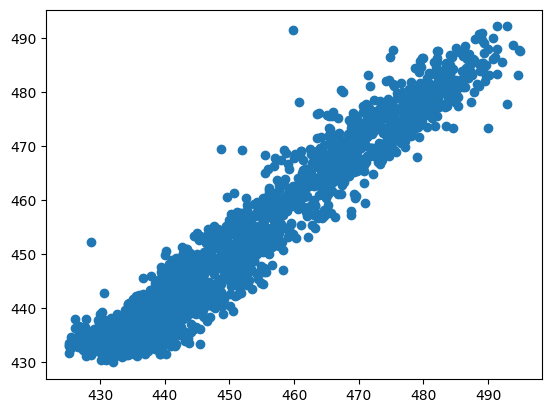

In [23]:
plt.scatter(y_test,y_pred);

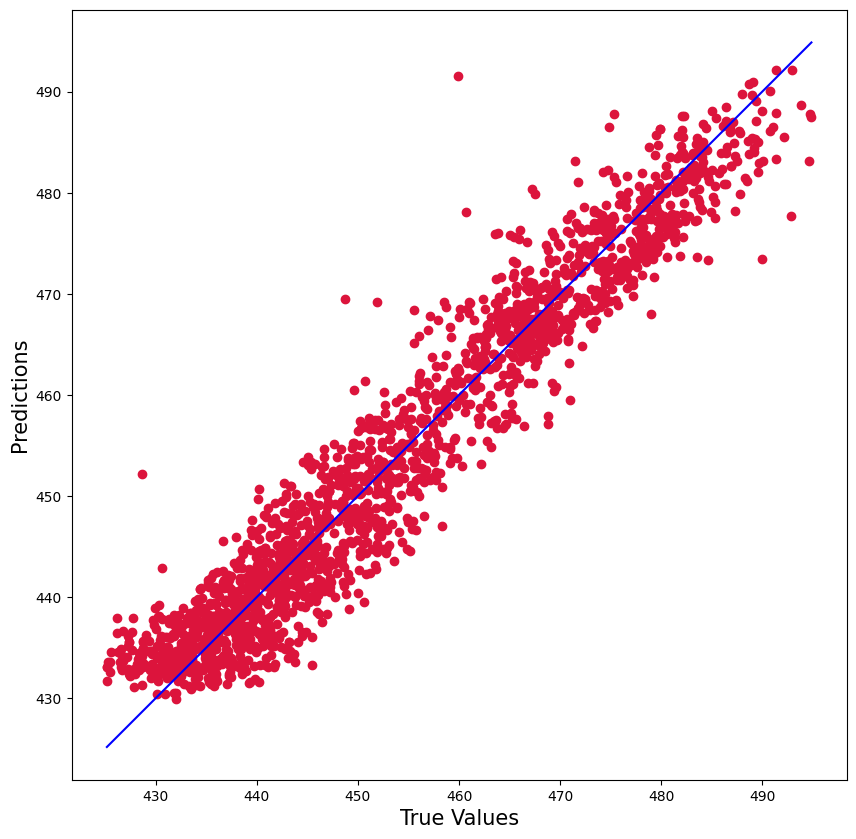

In [31]:
true_value = y_test
predict_value = y_pred

plt.figure(figsize=(10,10))
plt.scatter(true_value,predict_value,color='crimson')

p1 = max(max(predict_value),max(true_value))
p2 = min(min(predict_value),min(true_value))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values',fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.axis('equal');

In [32]:
# Comparacion con Regresion Lineal
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

y_pred_LR = LR_model.predict(x_test)

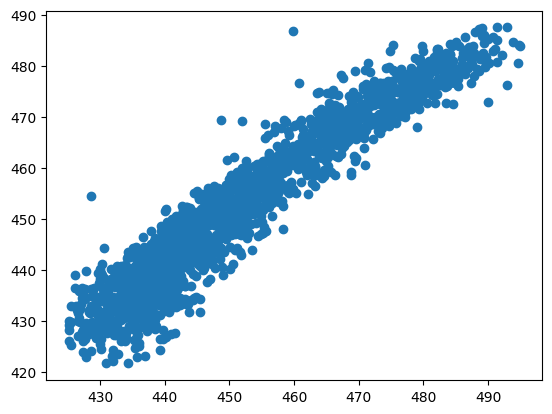

In [33]:
plt.scatter(y_test,y_pred_LR);

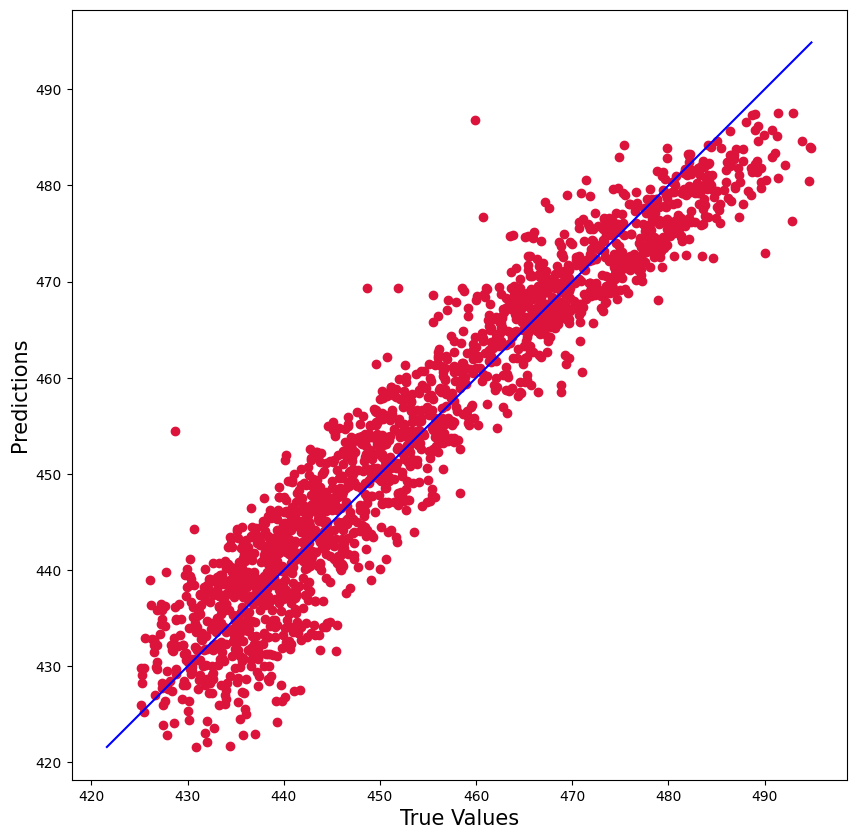

In [34]:
true_value = y_test
predict_value = y_pred_LR

plt.figure(figsize=(10,10))
plt.scatter(true_value,predict_value,color='crimson')

p1 = max(max(predict_value),max(true_value))
p2 = min(min(predict_value),min(true_value))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values',fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.axis('equal');

### Errores de Polinomica vs Lineal

In [36]:
print('Predicciones con Regresion Polinomica')
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Predicciones con Regresion Polinomica
MAE:  3.477472584352719
MSE:  19.479848976310063
RMSE:  4.413598189268034


In [37]:
print('Predicciones con Regresion Lineal')
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_LR))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_LR))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR)))

Predicciones con Regresion Lineal
MAE:  3.8725444861112637
MSE:  23.61983340284248
RMSE:  4.860024012578794
